In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("C:\Users\Prerna\Downloads\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df['Genre'].replace({"Male":0,"Female":1},inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [4]:
df1=df.iloc[:,3:5]
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

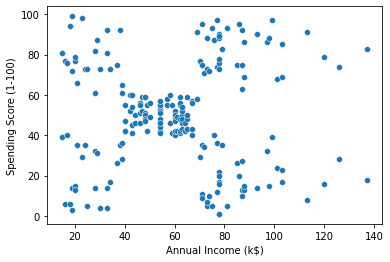

In [5]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')

In [27]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=0).fit(df1)
colors=km.labels_
centroids=km.cluster_centers_
x=[i[0] for i in centroids]
y=[i[1] for i in centroids]
colors

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

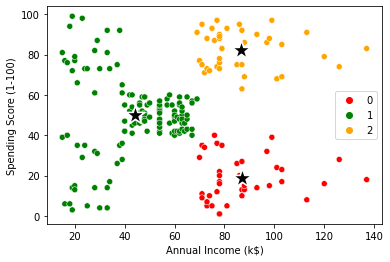

In [18]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue=colors,palette=['red','green','orange'])
sns.scatterplot(x=x,y=y,marker="*",s=400,color='Black')

In [19]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0).fit(df1)
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'WCSS')]

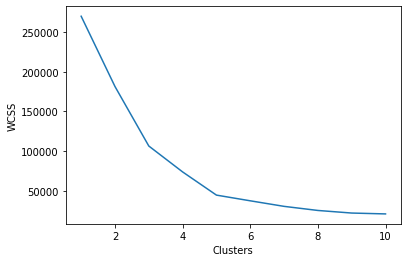

In [20]:
sns.lineplot(x=[i for i in range(1,11)],y=wcss).set(xlabel="Clusters",ylabel="WCSS")

In [21]:
from sklearn.cluster import KMeans
km1=KMeans(n_clusters=5,random_state=0).fit(df1)
colors1=km1.labels_
centroids1=km1.cluster_centers_
centroids1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [22]:
x1=[i[0] for i in centroids1]
y1=[i[1] for i in centroids1]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

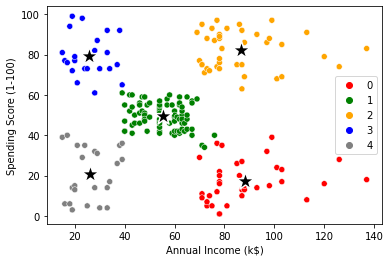

In [23]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue=colors1,palette=['red','green','orange','blue','grey'])
sns.scatterplot(x=x1,y=y1,marker='*',s=350,color='Black')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

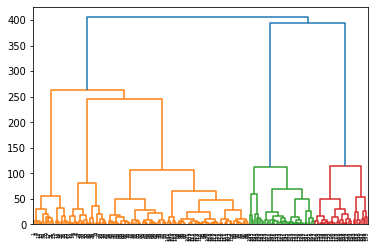

In [24]:
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(df1,method='ward'))


In [25]:
from sklearn.cluster import AgglomerativeClustering
clu=AgglomerativeClustering(n_clusters=5).fit(df1)
clu

AgglomerativeClustering(n_clusters=5)

In [26]:
color1=clu.labels_
color1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

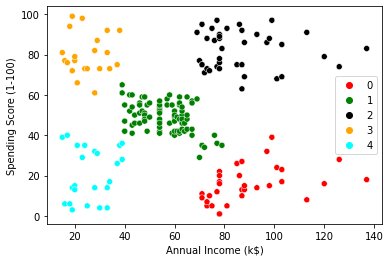

In [28]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue=color1,palette=['red','green','black','orange','cyan'])